# Levenshtein Distance
## Own simple implementation

First a simple base implementation of the edit distance algorithm (Levenshtein):

In [1]:
def levenshteinDP(str1, str2):
    # initialise matrix with only 0 values
    dist_matrix = [[0 for x in range(len(str1) + 1)] for y in range(len(str2) + 1)]

    # base case: insert amount of characters as the compared string is ''
    for i in range(len(str2) + 1):
        dist_matrix[i][0] = i
    for j in range(len(str1) + 1):
        dist_matrix[0][j] = j

    for i in range(1, len(str2) + 1, 1):
        for j in range(1, len(str1) + 1, 1):
            # current character the same?
            substitution_cost = 0
            if not (str2[i - 1] == str1[j - 1]):
                substitution_cost = 1

            dist_matrix[i][j] = min(
                dist_matrix[i - 1][j] + 1,                      # deletion
                dist_matrix[i][j - 1] + 1,                      # insertion
                dist_matrix[i - 1][j - 1] + substitution_cost,  # substitution
            )

    # resulting dp matrix
    return dist_matrix

A simple function to convert the result into a beautified string:

In [2]:
def stringify_distance_matrix(distance, compared_str1, compared_str2):
    # first row
    res = "    "
    for j in range(len(compared_str1)):
        res += compared_str1[j] + " "
    res += "\n"
    # second row until finish
    for i in range(len(compared_str2) + 1):
        # second string chars only starts from third row
        if i == 0:
            res += "  "
        else:
            res += compared_str2[i - 1] + " "
        # insert row values
        for j in range(len(compared_str1) + 1):
            res += str(distance[i][j]) + " "
        res += "\n"
    res += "=> lev_dist = " + str(distance[-1][-1])

    return res

A simple function to plot the result:

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distance_matrix(distance, compared_str1, compared_str2):
    distance = np.array(distance)
    fig, ax = plt.subplots()
    ax.matshow(distance, cmap=plt.cm.Blues)

    ax.set_xticks(np.arange(len(compared_str1) + 1))
    ax.set_yticks(np.arange(len(compared_str2) + 1))
    
    ax.set_xticklabels([""] + list(compared_str1))
    ax.set_yticklabels([""] + list(compared_str2))

    for x in range(distance.shape[0]):
        for y in range(distance.shape[1]):
            c = distance[x,y]
            ax.text(y, x, str(c), va='center', ha='center')

A few examples:

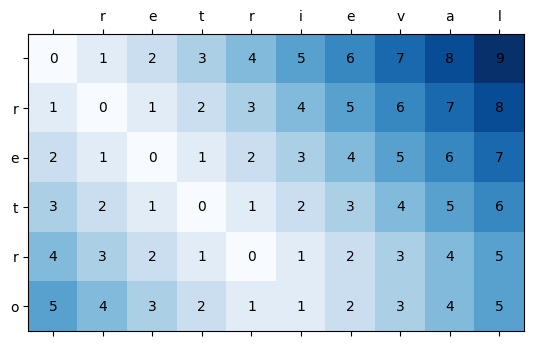

In [4]:
distance = levenshteinDP("retrieval", "retro")

plot_distance_matrix(distance, "retrieval", "retro")

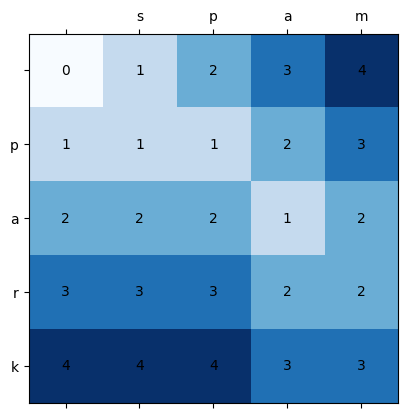

In [5]:
distance = levenshteinDP("spam", "park")

plot_distance_matrix(distance, "spam", "park")

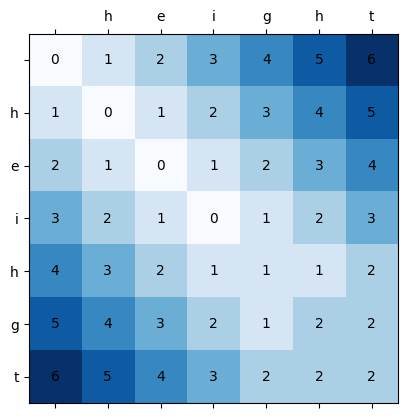

In [6]:
distance = levenshteinDP("height", "heihgt")

plot_distance_matrix(distance, "height", "heihgt")

## Library implementation

For the same examples as above we calculate the edit distance and show the operations needed
to convert the first string to the other one:

In [7]:
from Levenshtein import distance, editops

In [8]:
res = distance("retrieval", "retro")
print('lev_dist = ' + str(res))

editops('retrieval', 'retro')

lev_dist = 5


[('replace', 4, 4),
 ('delete', 5, 5),
 ('delete', 6, 5),
 ('delete', 7, 5),
 ('delete', 8, 5)]

In [9]:
res = distance("spam", "park")
print('lev_dist = ' + str(res))

editops('spam', 'park')

lev_dist = 3


[('delete', 0, 0), ('insert', 3, 2), ('replace', 3, 3)]

In [10]:
res = distance("height", "heihgt")
print('lev_dist = ' + str(res))

editops('height', 'heihgt')

lev_dist = 2


[('insert', 3, 3), ('delete', 4, 5)]